In [35]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [36]:
df = pd.read_csv('anemia_dataset.csv')
df

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,Anik,49.9999,29.2860,20.7141,14.5,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,101,Haradhan,42.2324,30.6757,27.0919,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,102,arefa,45.6064,31.9084,22.4852,12.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,103,diluara,45.2095,29.2769,25.5136,13.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.drop(columns=['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1, inplace=True)

In [38]:
df

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No
4,5,monoara,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,Anik,49.9999,29.2860,20.7141,14.5,Yes
100,101,Haradhan,42.2324,30.6757,27.0919,6.3,Yes
101,102,arefa,45.6064,31.9084,22.4852,12.7,No
102,103,diluara,45.2095,29.2769,25.5136,13.4,No


In [39]:
df.rename(columns={'%Red Pixel' : 'Red Pixel',
                   '%Green pixel' : ' Green Pixel',
                   '%Blue pixel' : 'Blue Pixel'}, inplace=True)

In [40]:
df

,Number,Name,Red Pixel,Green Pixel,Blue Pixel,Hb,Anaemic
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No
4,5,monoara,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,Anik,49.9999,29.2860,20.7141,14.5,Yes
100,101,Haradhan,42.2324,30.6757,27.0919,6.3,Yes
101,102,arefa,45.6064,31.9084,22.4852,12.7,No
102,103,diluara,45.2095,29.2769,25.5136,13.4,No


In [41]:
df.isnull().sum()

Number          0
Name            0
Red Pixel       0
 Green Pixel    0
Blue Pixel      0
Hb              0
Anaemic         0
dtype: int64

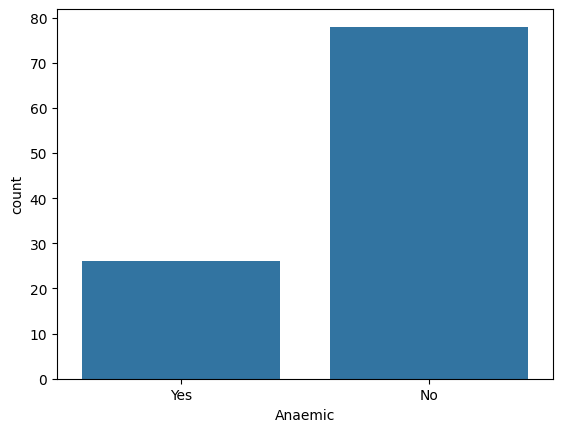

In [42]:
sns.countplot(data=df, x='Anaemic')
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cols in df.columns:
    if df[cols].dtype == 'object':
        df[cols] = le.fit_transform(df[cols])

In [44]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Name', 'Number', 'Anaemic'])
y = df['Anaemic']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 42)

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



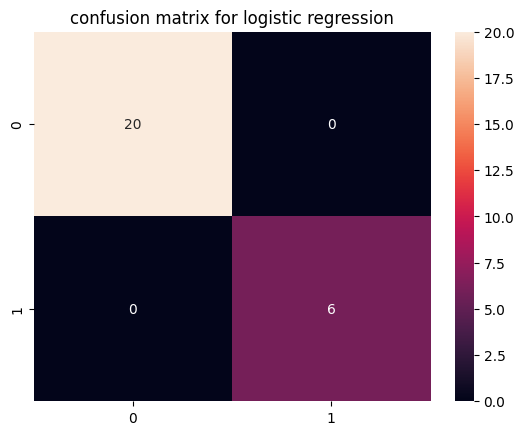

In [58]:
con_matrix = confusion_matrix(y_test,y_pred1)
sns.heatmap(con_matrix, annot=True )
plt.title('confusion matrix for logistic regression')
plt.show()

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred2  =nb.predict(x_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.83      0.91         6

    accuracy                           0.96        26
   macro avg       0.98      0.92      0.94        26
weighted avg       0.96      0.96      0.96        26



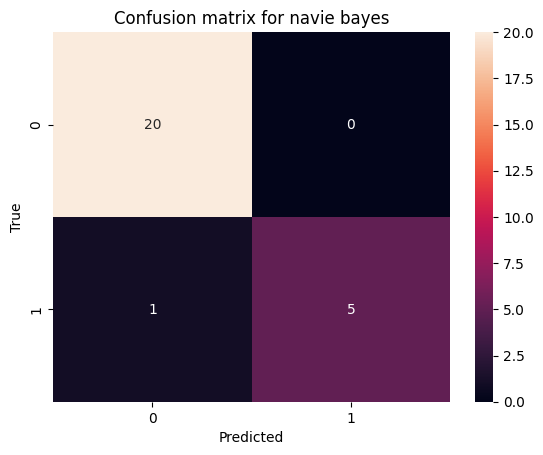

In [57]:
con_matrix = confusion_matrix(y_test,y_pred2)
sns.heatmap(con_matrix, annot=True)
plt.title('Confusion matrix for navie bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [47]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred3 = svc.predict(x_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred3))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.50      0.67         6

    accuracy                           0.88        26
   macro avg       0.93      0.75      0.80        26
weighted avg       0.90      0.88      0.87        26



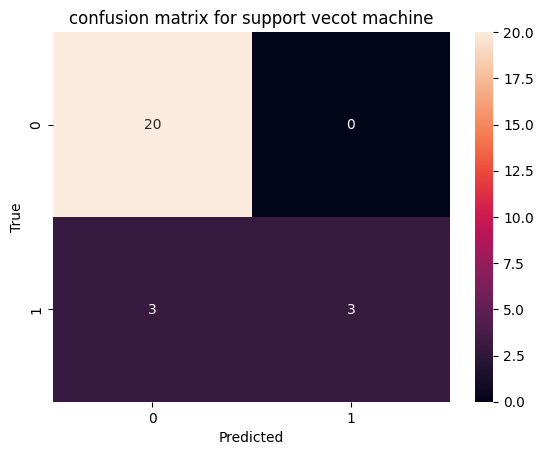

In [55]:
con_matrix = confusion_matrix(y_test,y_pred3)
sns.heatmap(con_matrix, annot=True )
plt.title('confusion matrix for support vecot machine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()